# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
#Read dataset

In [51]:
df=pd.read_csv('Advertising.csv')

In [52]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
#drop unwanted columns

In [53]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [54]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
#check number of rows and columns

In [55]:
df.shape

(200, 4)

In [56]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [57]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [59]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# data cleansing and outlier Analysis

In [60]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# outlier Analysis

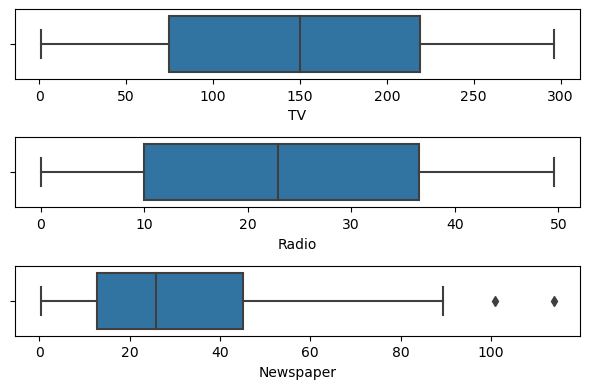

In [61]:
fig,axs=plt.subplots(3,figsize=(6,4))
plt1=sns.boxplot(df['TV'],ax=axs[0])
plt2=sns.boxplot(df['Radio'],ax=axs[1])
plt3=sns.boxplot(df['Newspaper'],ax=axs[2])
plt.tight_layout()

# EDA

<function matplotlib.pyplot.show(close=None, block=None)>

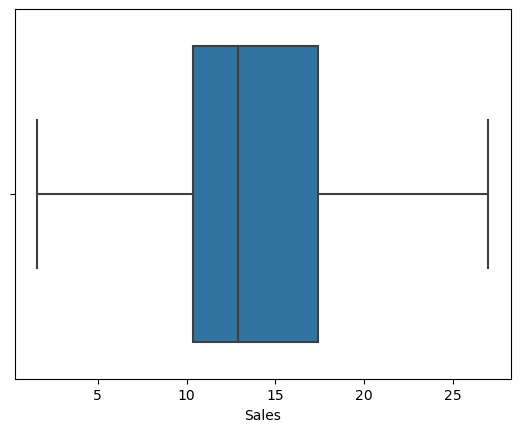

In [62]:
sns.boxplot(df['Sales'])
plt.show

# Scatter Plot Showing How Target Variable Sales is Related to Other Variables

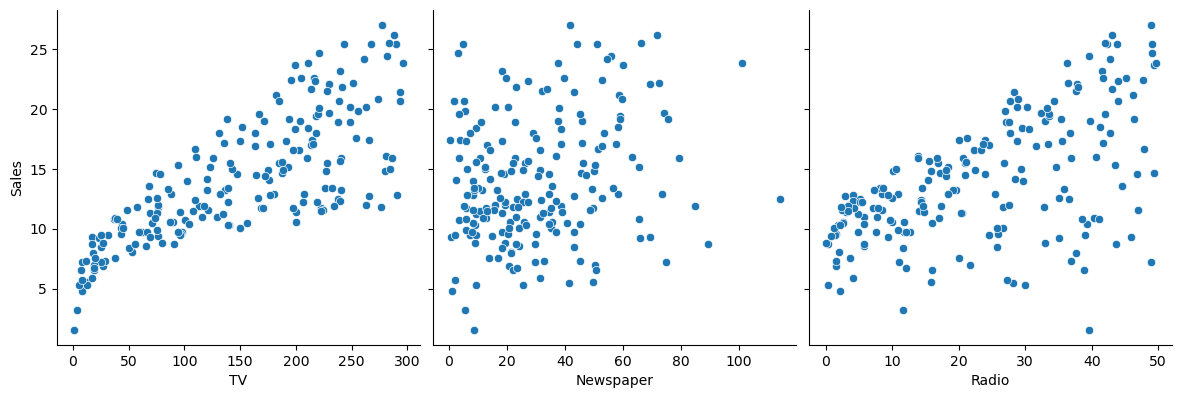

In [63]:
sns.pairplot(df,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',height=4,kind='scatter')
plt.show()

# Heatmap Showing Correlation Between Different Variables

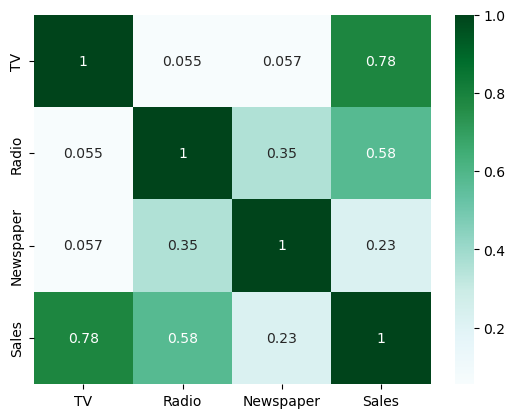

In [64]:
sns.heatmap(df.corr(),cmap='BuGn',annot=True)
plt.show()

# Building Simple Linear Regression Model for the TV as a feature variable

In [47]:
#Building Linear Regression: Showing Training Data

In [65]:
x=df['TV']
y=df['Sales']

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [75]:
x_train

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [74]:
y_train

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
       ... 
87     16.0
103    14.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64

In [99]:
x_test

126      7.8
104    238.2
99     135.2
92     217.7
111    241.7
167    206.8
116    139.2
96     197.6
52     216.4
69     216.8
164    117.2
124    229.5
182     56.2
154    187.8
125     87.2
196     94.2
194    149.7
177    170.2
163    163.5
31     112.9
11     214.7
73     129.4
15     195.4
41     177.0
97     184.9
128    220.3
133    219.8
82      75.3
139    184.9
123    123.1
83      68.4
65      69.0
151    121.0
162    188.4
170     50.0
77     120.5
32      97.2
173    168.4
174    222.4
85     193.2
168    215.4
112    175.7
171    164.5
181    218.5
7      120.2
46      89.7
75      16.9
28     248.8
29      70.6
195     38.2
40     202.5
153    171.3
115     75.1
64     131.1
59     210.7
1       44.5
192     17.2
136     25.6
152    197.6
161     85.7
Name: TV, dtype: float64

In [100]:
y_test

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
167    12.2
116    12.2
96     11.7
52     22.6
69     22.3
164    11.9
124    19.7
182     8.7
154    15.6
125    10.6
196     9.7
194    17.3
177    11.7
163    18.0
31     11.9
11     17.4
73     11.0
15     22.4
41     17.1
97     15.5
128    24.7
133    19.6
82     11.3
139    20.7
123    15.2
83     13.6
65      9.3
151    11.6
162    14.9
170     8.4
77     14.2
32      9.6
173    11.7
174    11.5
85     15.2
168    17.1
112    14.1
171    14.5
181    12.2
7      13.2
46     10.6
75      8.7
28     18.9
29     10.5
195     7.6
40     16.6
153    19.0
115    12.6
64     18.0
59     18.4
1      10.4
192     5.9
136     9.5
152    16.6
161    13.3
Name: Sales, dtype: float64

In [ ]:
# Building Linear Model: API Library and Displaying Regression Results of OLS Model

# Importing statsmodels

In [78]:
import statsmodels.api as sm

In [79]:
x_train_sm=sm.add_constant(x_train)

In [80]:
lnr=sm.OLS(y_train,x_train_sm).fit()

In [81]:
lnr.params

const    6.989666
TV       0.046497
dtype: float64

In [82]:
print(lnr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           2.84e-30
Time:                        15:29:37   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

# Linear Regression Equation is: Sales=6.989666+0.046497*TV And Visualizing Fit on the Training Data

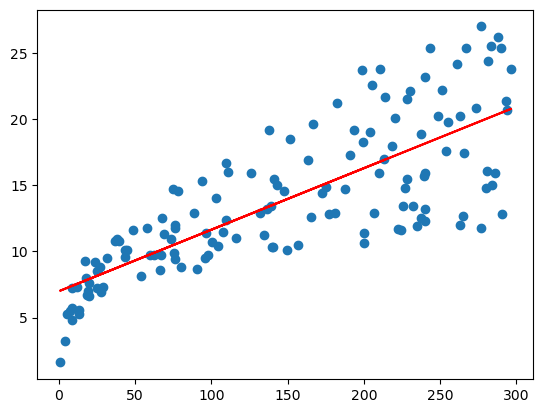

In [102]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.989666 + 0.046497*x_train,'r')
plt.show()

# Residual Analysis and Distribution of Errors

In [86]:
y_train_pred=lnr.predict(x_train_sm)
resid=(y_train-y_train_pred)

<Figure size 640x480 with 0 Axes>

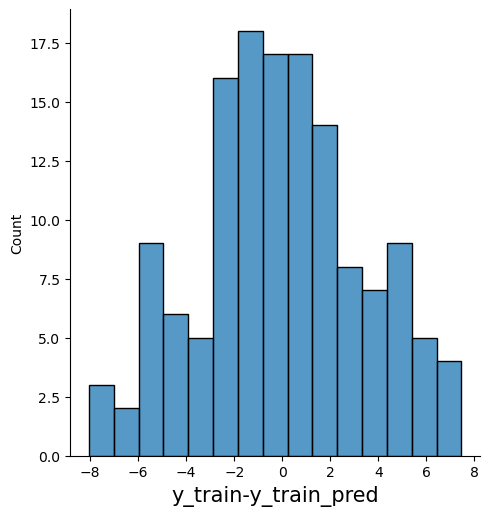

In [87]:
fig=plt.figure()
sns.displot(resid,bins=15)
fig.suptitle('Error Terms',fontsize=15)
plt.xlabel('y_train-y_train_pred',fontsize=15)
plt.show()

# Test Data Results

In [ ]:
#prediction on the test data set

In [89]:
x_test_sm=sm.add_constant(x_test)
y_pred=lnr.predict(x_test_sm)

In [90]:
y_pred

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
167    16.605320
116    13.462098
96     16.177544
52     17.051694
69     17.070293
164    12.439156
124    17.660810
182     9.602817
154    15.721870
125    11.044236
196    11.369717
194    13.950320
177    14.903516
163    14.591984
31     12.239218
11     16.972649
73     13.006424
15     16.075250
41     15.219698
97     15.587027
128    17.233034
133    17.209785
82     10.490917
139    15.587027
123    12.713491
83     10.170085
65     10.197984
151    12.615846
162    15.749768
170     9.314534
77     12.592598
32     11.509209
173    14.819821
174    17.330678
85     15.972956
168    17.005197
112    15.159252
171    14.638481
181    17.149339
7      12.578648
46     11.160479
75      7.775471
28     18.558209
29     10.272379
195     8.765865
40     16.405381
153    14.954663
115    10.481617
64     13.085470
59     16.786659
1       9.058798
192     7.789420
136     8.179998
152    16.1775

In [91]:
y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

In [92]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [93]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.8241456288327016

In [ ]:
Checking the R-squared value on the test data

In [121]:
r_squared=r2_score(y_test,y_pred)

In [122]:
r_squared

-0.1588989736629216

# visualizing fit on the data

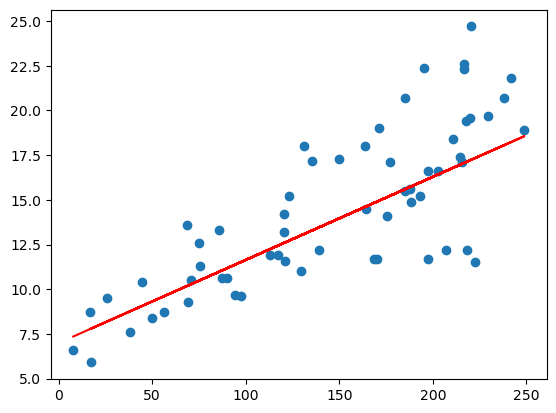

In [103]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.989666+0.046497*x_test,'r')
plt.show()

# Building Simple Linear Regression Model for the Newspaper as a feature variable

In [104]:
x=df['Newspaper']
y=df['Sales']

In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [106]:
x_train

74     13.1
3      58.5
185    19.6
26     12.6
90      9.3
       ... 
87     63.2
103    17.9
67     10.2
24     18.3
8       1.0
Name: Newspaper, Length: 140, dtype: float64

In [107]:
y_train

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
       ... 
87     16.0
103    14.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64

In [109]:
x_train_sm=sm.add_constant(x_train)

In [110]:
lnr=sm.OLS(y_train,x_train_sm).fit()

In [111]:
lnr.params

const        11.484399
Newspaper     0.075492
dtype: float64

In [112]:
print(lnr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     14.65
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           0.000195
Time:                        16:09:20   Log-Likelihood:                -430.09
No. Observations:                 140   AIC:                             864.2
Df Residuals:                     138   BIC:                             870.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4844      0.763     15.052      0.0

# Linear Regression Equation is: Sales= 11.484399+0.075492*Newspaper And Visualizing Fit on the Training Data


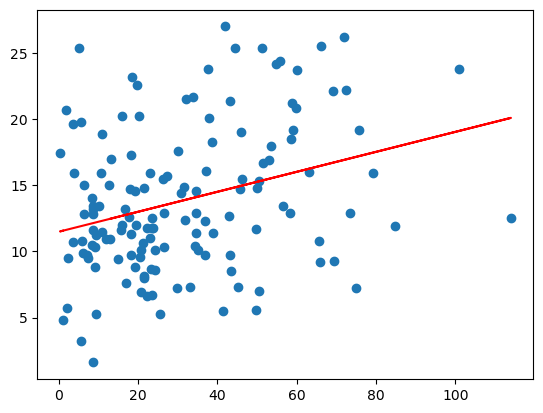

In [113]:
plt.scatter(x_train,y_train)
plt.plot(x_train, 11.484399 + 0.075492*x_train,'r')
plt.show()

# Residual Analysis and Distribution of Errors

In [116]:
y_train_pred=lnr.predict(x_train_sm)
resid=(y_train-y_train_pred)

<Figure size 640x480 with 0 Axes>

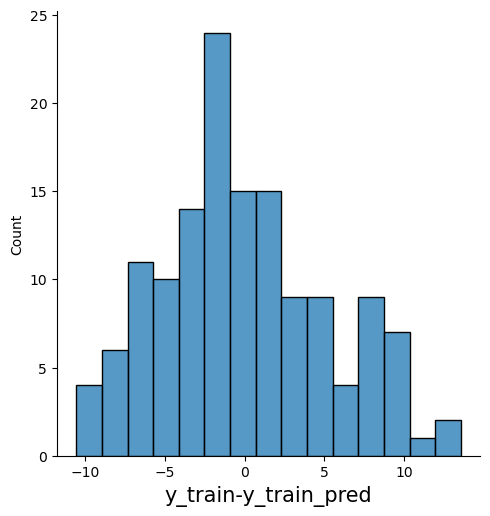

In [117]:
fig=plt.figure()
sns.displot(resid,bins=15)
fig.suptitle('Error Terms',fontsize=15)
plt.xlabel('y_train-y_train_pred',fontsize=15)
plt.show()

# Test Data Results

In [118]:
x_test_sm=sm.add_constant(x_test)
y_pred=lnr.predict(x_test_sm)

In [119]:
y_pred

126    15.304277
104    11.884505
99     14.949467
92     15.938407
111    13.235806
167    12.948937
116    13.416986
96     11.929800
52     14.473869
69     13.537772
164    11.892054
124    17.085881
182    13.726502
154    12.201570
125    13.439633
196    12.095882
194    11.937349
177    14.141706
163    12.043037
31     14.398377
11     11.786366
73     13.847288
15     15.477908
41     14.405927
97     13.145216
128    11.725972
133    14.889073
82     13.937878
139    11.612735
123    12.420496
83     14.171902
65     11.552342
151    15.160843
162    13.416986
170    12.873446
77     12.556381
32     13.749149
173    12.450692
174    12.473340
85     16.444202
168    15.832719
112    11.665579
171    15.062704
181    13.552871
7      12.360102
46     14.179452
75     18.233354
28     13.213158
29     14.564459
195    12.526184
40     13.869936
153    14.330435
115    15.462810
64     13.666108
59     12.186472
1      14.889073
192    13.869936
136    12.186472
152    12.5563

In [120]:
np.sqrt(mean_squared_error(y_test,y_pred))

4.773167681558674

In [123]:
r_squared=r2_score(y_test,y_pred)

In [124]:
r_squared

-0.1588989736629216

# visualizing fit on the data

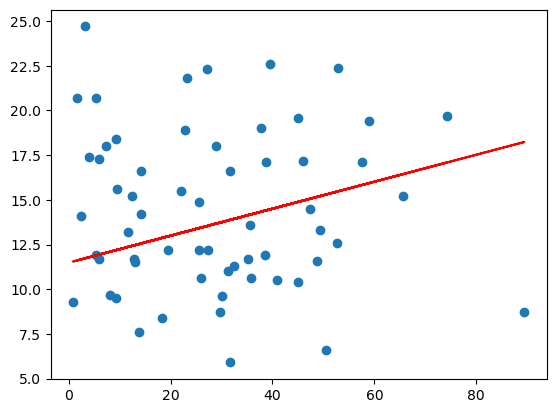

In [125]:
plt.scatter(x_test,y_test)
plt.plot(x_test,11.484399 + 0.075492*x_test,'r')
plt.show()

# Building Simple Linear Regression Model for the Radio as a feature variable

In [136]:
x=df['Radio']
y=df['Sales']

In [137]:
x_train

74     13.1
3      58.5
185    19.6
26     12.6
90      9.3
Name: Newspaper, dtype: float64

In [138]:
y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: Sales, dtype: float64

In [142]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [143]:
x_train_sm=sm.add_constant(x_train)

In [144]:
lnr=sm.OLS(y_train,x_train_sm).fit()

In [145]:
lnr.params

const    9.247973
Radio    0.201073
dtype: float64

In [146]:
print(lnr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     60.51
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           1.54e-12
Time:                        16:28:17   Log-Likelihood:                -411.70
No. Observations:                 140   AIC:                             827.4
Df Residuals:                     138   BIC:                             833.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2480      0.709     13.036      0.0

# Linear Regression Equation is: Sales=  9.247973+0.201073*Radio And Visualizing Fit on the Training Data

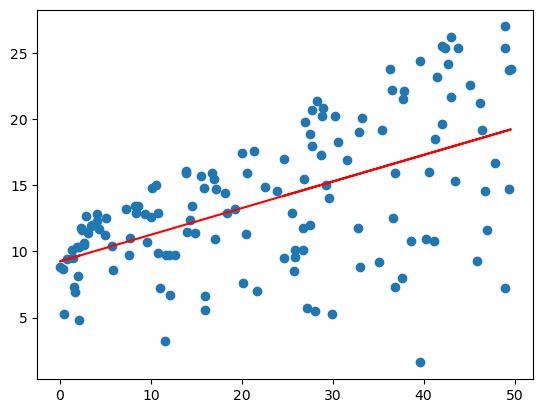

In [149]:
plt.scatter(x_train,y_train)
plt.plot(x_train, 9.247973+0.201073*x_train,'r')
plt.show()

# 

# Residual Analysis and Distribution of Errors

In [150]:
y_train_pred=lnr.predict(x_train_sm)
resid=(y_train-y_train_pred)

<Figure size 640x480 with 0 Axes>

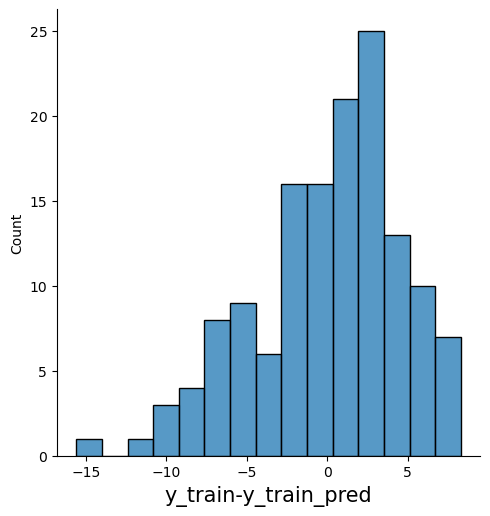

In [151]:
fig=plt.figure()
sns.displot(resid,bins=15)
fig.suptitle('Error Terms',fontsize=15)
plt.xlabel('y_train-y_train_pred',fontsize=15)
plt.show()

# Test Data Results

In [152]:
x_test_sm=sm.add_constant(x_test)
y_pred=lnr.predict(x_test_sm)

In [153]:
y_pred

126    17.069710
104    16.144774
99     17.632714
92     15.983916
111    16.888744
167    10.293552
116    12.123316
96      9.951728
52     17.632714
69     18.075074
164    12.203745
124    15.742629
182    10.394089
154    13.490612
125    11.620634
196    10.233230
194    16.406169
177    10.816342
163    16.647457
31     12.746642
11     14.073723
73     10.394089
15     18.839152
41     15.963809
97     13.470505
128    19.100546
133    15.983916
82     13.329753
139    18.075074
123    16.205096
83     18.195718
65     11.117951
151    10.936986
162    12.887393
170    11.580419
77     14.978551
32      9.549583
173    10.675591
174     9.931621
85     12.947715
168    13.993294
112    12.344496
171    13.450397
181    10.333767
7      13.189002
46     11.238595
75     18.034860
28     14.697049
29     12.465140
195     9.991943
40     13.731899
153    17.230568
115    16.285525
64     17.853894
59     15.179624
1      17.150139
192    10.072372
136    17.089817
152    13.9329

In [154]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.3747017041729364

In [155]:
r_squared=r2_score(y_test,y_pred)

In [156]:
r_squared

0.42070073559047305

# visualizing fit on the data

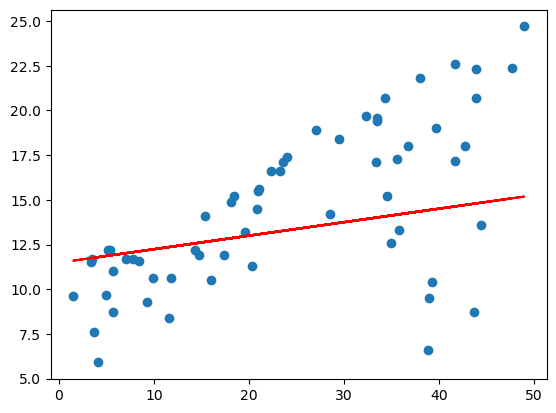

In [157]:
plt.scatter(x_test,y_test)
plt.plot(x_test,11.484399 + 0.075492*x_test,'r')
plt.show()